In [2]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('Life Expectancy Data.csv')

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

gdp_per_capita = data.gdp/data.population
data['gdp_per_capita'] = gdp_per_capita

np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8)) # 80% training, 20% test
test = data.drop(train.index)

/var/folders/0x/61vcmsg94cs94n1kc433lq8w0000gn/T/ipykernel_70276/1437335773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
/var/folders/0x/61vcmsg94cs94n1kc433lq8w0000gn/T/ipykernel_70276/1437335773.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [24]:
data.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,gdp_per_capita
year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,...,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400,0.008695
life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,...,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975,0.059383
adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,...,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612,-0.047054
infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,...,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720,-0.019259
alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,...,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378,-0.014493
percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,...,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687,0.030592
hepatitis_b,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,...,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117,0.037788
measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,...,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225,-0.015423
bmi,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,...,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961,-0.019586
under-five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,...,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373,-0.019762


In [25]:
data.corrwith(data.life_expectancy).sort_values(ascending=False)

life_expectancy                    1.000000
schooling                          0.751975
income_composition_of_resources    0.724776
bmi                                0.567694
diphtheria                         0.479495
polio                              0.465556
gdp                                0.461455
alcohol                            0.404877
percentage_expenditure             0.381864
hepatitis_b                        0.256762
total_expenditure                  0.218086
year                               0.170033
gdp_per_capita                     0.059383
population                        -0.021538
measles                           -0.157586
infant_deaths                     -0.196557
under-five_deaths                 -0.222529
thinness_5-9_years                -0.471584
thinness__1-19_years              -0.477183
hiv/aids                          -0.556556
adult_mortality                   -0.696359
dtype: float64

<AxesSubplot:>

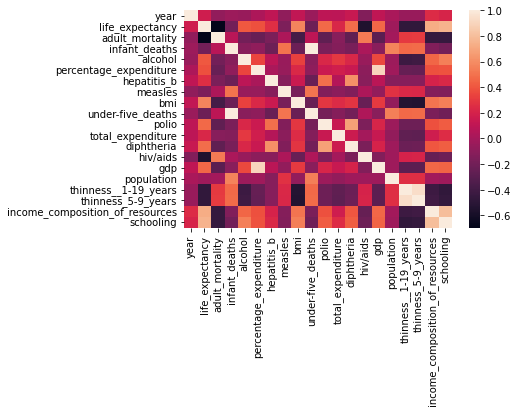

In [8]:
# heatmap
sns.heatmap(data.corr())

In [ ]:
data.columns

In [52]:
ols_object = smf.ols(formula = 'life_expectancy~schooling+income_composition_of_resources+bmi+diphtheria+measles+gdp', data=train)
model = ols_object.fit()

# returning numerical/statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     682.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:01   Log-Likelihood:                -6124.4
No. Observations:                1964   AIC:                         1.226e+04
Df Residuals:                    1957   BIC:                         1.230e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [10]:
#Computing RMSE on test data
pred_life = model.predict(test)
np.sqrt(((test.life_expectancy - pred_life)**2).mean())

5.6214939317626715

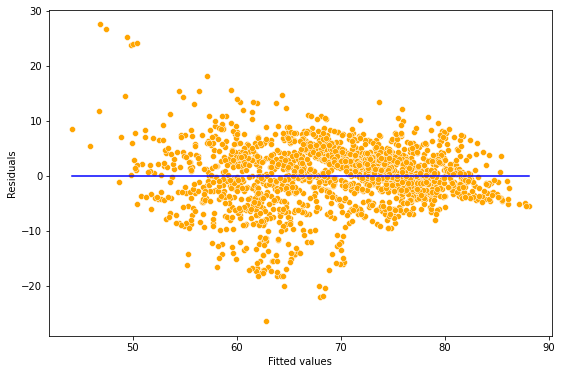

In [36]:
ax = sns.scatterplot(x = (model.fittedvalues), y=(model.resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
ax.figure.set_figwidth(9)
ax.figure.set_figheight(6)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [54]:
# Use outlier_test() method to find h
out=model.outlier_test()

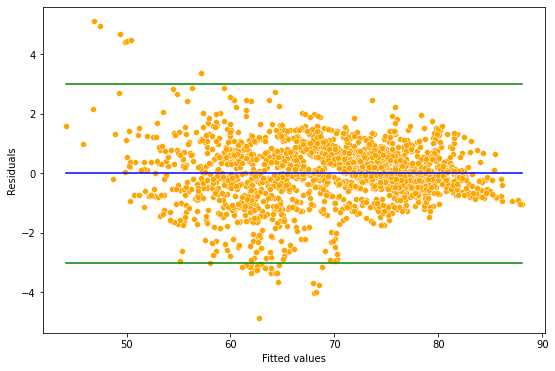

In [40]:
#Res plot with student res
ax = sns.scatterplot(x = (model.fittedvalues), y=(out.student_resid),color = 'orange')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()],y = [0,0],color = 'blue')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()], y = [3,3], color = 'green')
sns.lineplot(x = [model.fittedvalues.min(),model.fittedvalues.max()], y = [-3,-3], color = 'green')
ax.figure.set_figwidth(9)
ax.figure.set_figheight(6)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [45]:
# Calculate the leverage
influence = model.get_influence()
leverage = influence.hat_matrix_diag # lev values for each obs

In [55]:
# Avg leverage - avg leverage = num preds + 1 / num obs
average_leverage = (model.df_model+1)/model.nobs
average_leverage

0.003564154786150713

In [43]:
# Determine cutoff for high lev - general convention is 4*avg leverage
cutoff = 4*average_leverage

In [57]:
print(np.sum(leverage>cutoff))

63


In [60]:
#Dropping influential points from data

# Filtering the training set using the indices of influential points 
     #intersection of outlier and high lev indicies
train_filtered = train.drop(np.intersect1d(np.where(np.abs(out.student_resid)>3)[0],
                                           (np.where(leverage>cutoff)[0])))
# new dataset number of obs
print(train_filtered.shape)
#Number of points removed as they were influential
print(train.shape[0]-train_filtered.shape[0])

KeyError: '[132] not found in axis'

In [ ]:
ols_object = smf.ols(formula = 'life_expectancy~schooling+income_composition_of_resources+bmi+diphtheria+measles+gdp', data=train.filtered)
model = ols_object.fit()


# returning numerical/statistical analysis
print(model.summary())

<AxesSubplot:xlabel='gdp_per_capita', ylabel='life_expectancy'>

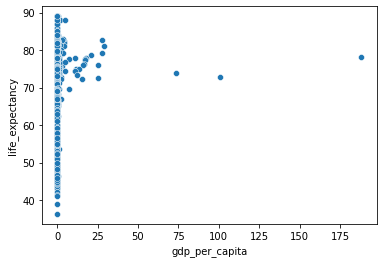

In [27]:
sns.scatterplot(data=data, x='gdp_per_capita',  y='life_expectancy')

In [35]:
data.loc(data['gdp_per_capita'].nlargest(n=5))

TypeError: unhashable type: 'Series'

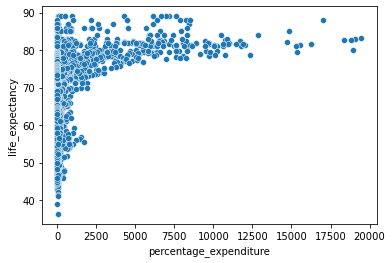

In [14]:
sns.scatterplot(x ='percentage_expenditure' , y='life_expectancy',data = data)
plt.show()

In [16]:
data.percentage_expenditure

0       71.279624
1       73.523582
2       73.219243
3       78.184215
4        7.097109
          ...    
2933     0.000000
2934     0.000000
2935     0.000000
2936     0.000000
2937     0.000000
Name: percentage_expenditure, Length: 2938, dtype: float64

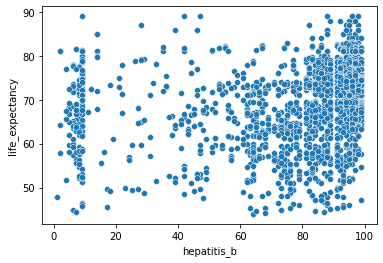

In [15]:
sns.scatterplot(x ='hepatitis_b' , y='life_expectancy',data = data)
plt.show()

<AxesSubplot:xlabel='alcohol', ylabel='life_expectancy'>

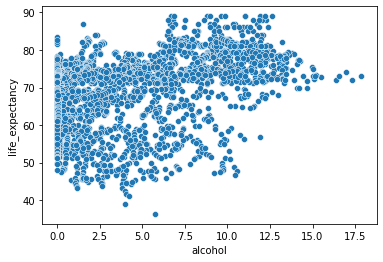

In [17]:
sns.scatterplot(x ='alcohol' , y='life_expectancy',data = data)